In [129]:
import pandas as pd
import numpy as np
from datetime import date

import lifetimes

In [130]:
import numpy as np
import sklearn

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
pd.options.mode.chained_assignment = None

In [134]:
cust = pd.read_csv('P:/onestore/customer_df_2345_final2.csv')

In [135]:
test = pd.read_csv('P:/onestore/customer_df_67_final2.csv')

In [136]:
pd.set_option('display.max_columns', None)

In [137]:
cust.head()

,sex_clsf_cd,age_cd,total_prchs_cnt,weekend_prchs_cnt,total_payment_amt,total_cpt_amt,total_prod_amt,pref_tm,dly_prchs_amt_max,dly_prchs_amt_min,mly_prchs_amt_min,mly_prchs_amt_max,mly_prchs_amt_mean,wly_prchs_amt_max,wly_prchs_amt_min,wly_prchs_amt_mean,frequency,recency,T,dt_step_min,dt_step_max,dt_step_mean,bin_count,pref_category_eBook,pref_category_만화,pref_category_오디오북,pref_category_웹소설,pref_category_웹툰,pref_category_정액제,mno_cd_US001201,mno_cd_US001202,mno_cd_US001203,mno_cd_US001205,mno_cd_US001206,mno_cd_US001208,mno_cd_US001209,mno_cd_US001210,cluster_label_0,cluster_label_1,cluster_label_2
0,1,42,2.397895,1.098612,11.175086,7.771067,11.207772,6,10.927215,9.658929,9.658929,10.927215,10.481953,10.927215,9.658929,10.481953,0.693147,32.0,63.0,3.496508,32.0,32.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,40,5.308268,4.663439,4.564348,8.795734,10.043293,6,4.564348,0.000000,0.000000,4.564348,3.881564,4.564348,0.000000,2.555287,3.610918,50.0,50.0,0.693147,6.0,1.4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,39,3.258097,2.890372,8.716208,5.303305,8.748464,6,7.696667,6.398595,7.496097,7.696667,7.617923,7.696667,6.398595,7.330405,1.386294,66.0,66.0,2.708050,36.0,16.5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,45,5.003946,2.639057,12.605322,10.317615,12.701991,6,10.950824,0.000000,0.000000,12.195446,11.219038,11.581854,0.000000,10.302767,2.995732,116.0,118.0,0.693147,40.0,5.8,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,1,52,3.761200,3.044522,11.790943,9.301186,11.870607,6,10.236418,8.188967,9.968854,10.609082,10.404672,10.236418,8.881975,9.593779,2.564949,119.0,120.0,0.693147,32.0,9.2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [138]:
cust['dt_step_max'] = cust['dt_step_max'].apply(lambda x: np.log1p(x))
cust['dt_step_mean'] = cust['dt_step_mean'].apply(lambda x: np.log1p(x))

In [139]:
test['dt_step_max'] = test['dt_step_max'].apply(lambda x: np.log1p(x))
test['dt_step_mean'] = test['dt_step_mean'].apply(lambda x: np.log1p(x))

## ZZZ 빼기

In [140]:
# cust['bin_count'] = cust['total_buys'].apply(lambda x: 0 if x<1 else 1)

In [141]:
cust_x = cust.drop(['bin_count'], axis = 1) 

In [142]:
# 2345월과 67월 고객 수 차이 
# display(cust.shape, test.shape)
# 130530명, 101778명

## 라벨링

In [143]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for i in cust.columns[cust.dtypes == object]:
#     le.fit(list(cust[i]))
#     cust[i] = le.transform(list(cust[i]))
    
    
# le.fit(cust['sex_clsf_cd'])
# cust['sex_clsf_cd'] = le.transform(list(cust['sex_clsf_cd']))


# # object types > 모두 변환

In [144]:
# pp.ProfileReport(cust)

## Train_Val_Test_split

In [145]:
# x가 대입값들, y가 정답값들

x_train, x_val, y_train, y_val = train_test_split(cust_x, cust['bin_count'], test_size = 0.25, random_state = 42,stratify = cust['bin_count'])

In [146]:
x_test = test.drop(['bin_count'], axis = 1)
y_test = test['bin_count']

In [147]:
# pred_train = rf.predict(x_train)
# pred_train

## Modeling

(x_train, y_train) (x_val, y_val) (x_test, y_test) 

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

In [172]:
# # x_train, y_train 넣고, rf 모델 만듦
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1)
rf.fit(x_train, y_train)

# # x_train, y_train 넣고, rf 모델 만듦

RandomForestClassifier(n_jobs=-1)

In [173]:
pred_test = rf.predict(x_test)
print(f'test accuracy: {accuracy_score(y_test, pred_test)}')
print(f'recall: {recall_score(y_test, pred_test)}')
print(f'precision: {precision_score(y_test, pred_test)}')
print(confusion_matrix(y_test, pred_test))

test accuracy: 0.8568166197370464
recall: 0.7482097649186257
precision: 0.7765182794084529
[[56602  5954]
 [ 6962 20688]]


In [169]:
pred_train = rf.predict(x_train)
print(f'training accuracy: {accuracy_score(y_train, pred_train)}')
print(f'recall: {recall_score(y_train, pred_train)}')
print(f'precision: {precision_score(y_train, pred_train)}')
print(confusion_matrix(y_train, pred_train))

training accuracy: 0.9999764214894545
recall: 0.999934132525359
precision: 1.0
[[54459     0]
 [    2 30362]]


## 그리드서치

In [108]:
import timeit
from sklearn.model_selection import GridSearchCV

In [109]:
# # GridSearchCV를 이용

# n_estimators = [300, 500]
# # n_estimators = [300]
# min_samples_leaf = [1]
# max_depth = [10, 15]
# min_samples_split = [2]
# # max_features = ['auto']
# max_samples = [0.3, 0.7]

# params = {'n_estimators' : n_estimators, 'max_depth' : max_depth, 
#               'min_samples_leaf': min_samples_leaf, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split} 

# rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=4, scoring='accuracy', n_jobs = -1)

# start_time = timeit.default_timer()
# rf_grid.fit(x_train, y_train)
# terminate_time = timeit.default_timer()

# print('opt para : {0}, av auc :{1:.3f}'.format(rf_grid.best_params_, rf_grid.best_score_))
# print('%f초 걸림.' %(terminate_time - start_time))

# scores_df = pd.DataFrame(rf_grid.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score']]

In [110]:
# 왜도 안좋아진 recency t 로그변환 안함

In [178]:
# x_train, y_train 넣고, rf 모델 만듦
from sklearn.ensemble import RandomForestClassifier
rf_opt = RandomForestClassifier(n_jobs = -1, max_depth = 15, max_features = 0.5, min_samples_split = 2, min_samples_leaf = 1, n_estimators = 500,random_state = 42)
rf_opt.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, max_features=0.5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [112]:
cust1 = cust.drop(['bin_count'], axis = 1)

## 피쳐중요도 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50937 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from c

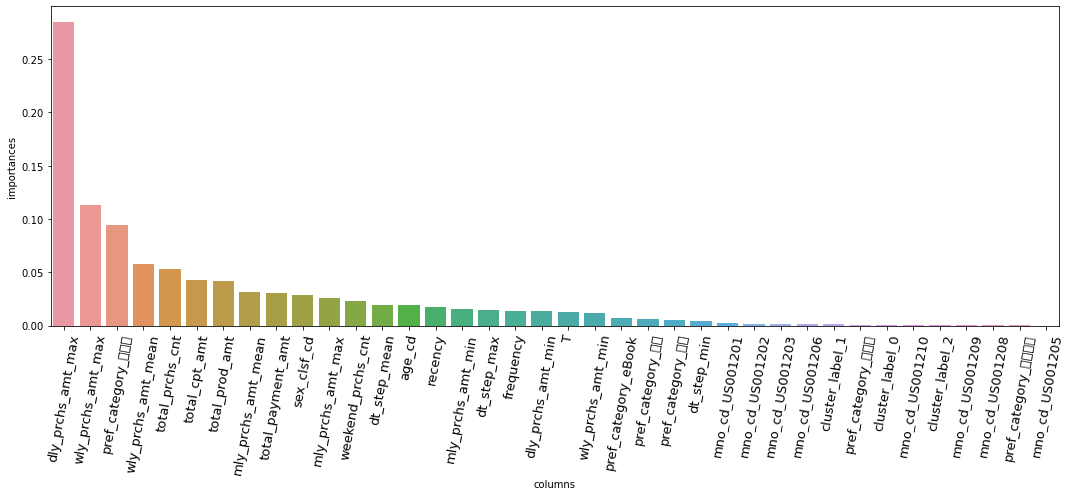

In [113]:
importance = rf_opt.feature_importances_
df_fi = pd.DataFrame({'columns':cust1.columns[:], 'importances':importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

In [114]:
# roc_curve_plot(y_test, pred_proba)

In [115]:
pred_val = rf_opt.predict(x_val)
print(f'validation accuracy: {accuracy_score(y_val, pred_val)}')
print(f'recall: {recall_score(y_val, pred_val)}')
print(f'precision: {precision_score(y_val, pred_val)}')
print(confusion_matrix(y_val, pred_val))

validation accuracy: 0.8571175950486295
recall: 0.7761090801304219
precision: 0.8157648769342611
[[16380  1774]
 [ 2266  7855]]


In [116]:
pred_val = rf.predict(x_val)
print(f'validation accuracy: {accuracy_score(y_val, pred_val)}')
print(f'recall: {recall_score(y_val, pred_val)}')
print(f'precision: {precision_score(y_val, pred_val)}')
print(confusion_matrix(y_val, pred_val))

validation accuracy: 0.8540760389036252
recall: 0.7666238513980832
precision: 0.8147642549616717
[[16390  1764]
 [ 2362  7759]]


## 함수값 비교해보기

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
def get_clf_eval(y_test, pred=None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [175]:
def roc_curve_plot(y_test, pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
    plt.legend()
    

In [176]:
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

 #train VS val
오차 행렬
[[16392  1762]
 [ 2370  7751]]
정확도: 0.8539, 정밀도: 0.8148, 재현율: 0.7658, F1: 0.7895, AUC: 0.9275
# train VS test
오차 행렬
[[56602  5954]
 [ 6962 20688]]
정확도: 0.8568, 정밀도: 0.7765, 재현율: 0.7482, F1: 0.7621, AUC: 0.9256


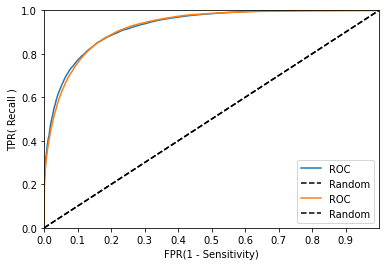

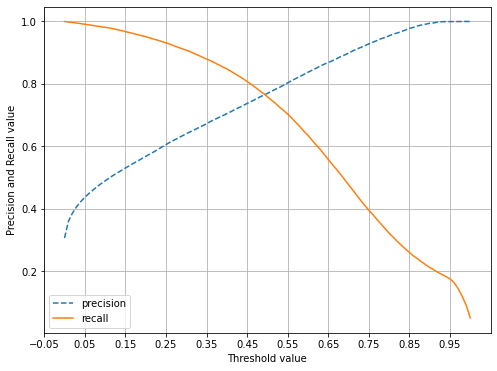

In [177]:
#test set 평가
rf_pred_proba_val = rf.predict_proba(x_val)
rf_pred_val = rf.predict(x_val)

#test set 평가
rf_pred_proba_test = rf.predict_proba(x_test)
rf_pred_test = rf.predict(x_test)


#validation set 평가
print('=========================================================================')
print(' #train VS val')
get_clf_eval(y_val, rf_pred_val, rf_pred_proba_val[:,1])
roc_curve_plot(y_val, rf_pred_proba_val[:, 1])


print('=========================================================================')
print('# train VS test')
get_clf_eval(y_test, rf_pred_test, rf_pred_proba_test[:,1])
roc_curve_plot(y_test, rf_pred_proba_test[:, 1])

precision_recall_curve_plot(y_test, rf_pred_proba_test[:,1])

 #train VS val
오차 행렬
[[16380  1774]
 [ 2266  7855]]
정확도: 0.8571, 정밀도: 0.8158, 재현율: 0.7761, F1: 0.7954, AUC: 0.9314
# train VS test
오차 행렬
[[56405  6151]
 [ 6160 21490]]
정확도: 0.8635, 정밀도: 0.7775, 재현율: 0.7772, F1: 0.7773, AUC: 0.9315


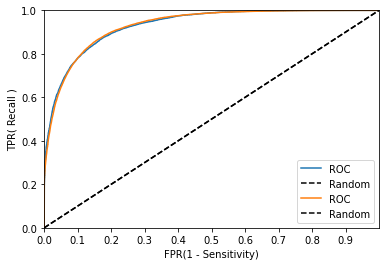

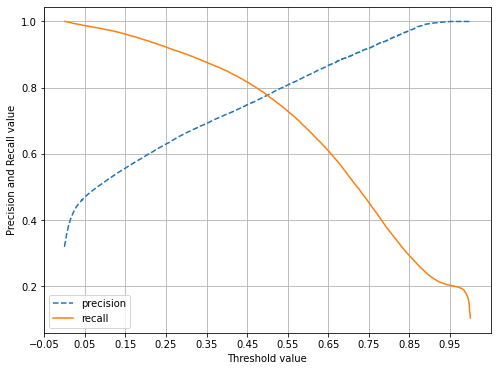

In [179]:
#test set 평가
rf_opt_pred_proba_val = rf_opt.predict_proba(x_val)
rf_opt_pred_val = rf_opt.predict(x_val)

#test set 평가
rf_opt_pred_proba_test = rf_opt.predict_proba(x_test)
rf_opt_pred_test = rf_opt.predict(x_test)


#validation set 평가
print('=========================================================================')
print(' #train VS val')
get_clf_eval(y_val, rf_opt_pred_val, rf_opt_pred_proba_val[:,1])
roc_curve_plot(y_val, rf_opt_pred_proba_val[:, 1])


print('=========================================================================')
print('# train VS test')
get_clf_eval(y_test, rf_opt_pred_test, rf_opt_pred_proba_test[:,1])
roc_curve_plot(y_test, rf_opt_pred_proba_test[:, 1])

precision_recall_curve_plot(y_test, rf_opt_pred_proba_test[:,1])

In [180]:
pred_test = rf_opt.predict(x_test)
print(f'test accuracy: {accuracy_score(y_test, pred_test)}')
print(f'recall: {recall_score(y_test, pred_test)}')
print(f'precision: {precision_score(y_test, pred_test)}')
print(confusion_matrix(y_test, pred_test))

test accuracy: 0.8635234906768952
recall: 0.7772151898734178
precision: 0.7774682536811258
[[56405  6151]
 [ 6160 21490]]


## 비교 코드

In [123]:
pred_train = rf_opt.predict(x_train)
print(f'training accuracy: {accuracy_score(y_train, pred_train)}')
print(f'recall: {recall_score(y_train, pred_train)}')
print(f'precision: {precision_score(y_train, pred_train)}')
print(confusion_matrix(y_train, pred_train))

training accuracy: 0.9447673390471923
recall: 0.9161507047819787
precision: 0.9285976566411857
[[52320  2139]
 [ 2546 27818]]


In [124]:
pred_val = rf_opt.predict(x_val)
print(f'validation accuracy: {accuracy_score(y_val, pred_val)}')
print(f'recall: {recall_score(y_val, pred_val)}')
print(f'precision: {precision_score(y_val, pred_val)}')
print(confusion_matrix(y_val, pred_val))

validation accuracy: 0.8571175950486295
recall: 0.7761090801304219
precision: 0.8157648769342611
[[16380  1774]
 [ 2266  7855]]


In [125]:
pred_test = rf_opt.predict(x_test)
print(f'test accuracy: {accuracy_score(y_test, pred_test)}')
print(f'recall: {recall_score(y_test, pred_test)}')
print(f'precision: {precision_score(y_test, pred_test)}')
print(confusion_matrix(y_test, pred_test))

test accuracy: 0.8635234906768952
recall: 0.7772151898734178
precision: 0.7774682536811258
[[56405  6151]
 [ 6160 21490]]


In [128]:
import pickle
import joblib
joblib.dump(rf_opt,'rf_opt.pkl' )

['rf_opt.pkl']